## Importing Libraries

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import metrics

import scipy.stats as stats

import pylab

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import pickle

from pycaret.classification import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading our dataset

df = pd.read_csv("weather_data.csv")

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
# Storing Numerical features

num_var = [feature for feature in df.columns if df[feature].dtypes != "O"]

df[num_var]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


There are two types of <b>Numerical Variable</b> :-
* Discrete
* Continuous 

In [ ]:
# Storing Discrete features

discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]

df[discrete_var]

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,NaN,2.0
3,NaN,NaN
4,7.0,8.0
...,...,...
145455,NaN,NaN
145456,NaN,NaN
145457,NaN,NaN
145458,3.0,2.0


In [ ]:
# Storing Continuous features

cont_var = [feature for feature in num_var if feature not in discrete_var]

df[cont_var]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


In [ ]:
# Stroing Categorical features

categ_var = [feature for feature in df.columns if feature not in num_var]

df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


## Handling Missing Values

In [ ]:
print(f"There are total {df.isnull().sum().sum()} null values in the dataset")

There are total 343248 null values in the dataset


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
np.round(df.isnull().sum()*100/len(df), 2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

### Checking variable's type

In [ ]:
def find_var_type(var):
    if var in discrete_var:
        print(f"{var} is a Numerical Variable, Discrete in nature")
    elif var in cont_var:
        print(f"{var} is a Numerical Variable, Continuous in nature")
    else:
        print(f"{var} is a Categorical Variable")

In [ ]:
find_var_type("Date")

Date is a Categorical Variable


### Random Sample Imputation

In [ ]:
def RandomSampleImputation(df, feature):
    df[feature] = df[feature]
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state = 0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

In [ ]:
RandomSampleImputation(df, "Cloud9am") # 38% of null values (55888 null values)
RandomSampleImputation(df, "Cloud3pm") # 40%
RandomSampleImputation(df, "Evaporation") # 43%
RandomSampleImputation(df, "Sunshine") # 48%

In [ ]:
print(f"Results after Random Sampling\n\n{np.round(df.isnull().sum()*100/len(df), 2)}")

Results after Random Sampling

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation       0.00
Sunshine          0.00
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am          0.00
Cloud3pm          0.00
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64


In [ ]:
find_var_type("RainToday")

RainToday is a Categorical Variable


### Again, performing Random Sample Imputation (for less number of null values)

In [ ]:
# Mean Imputation

def MeanImputation(df, feature):
    df[feature] = df[feature]
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)

In [ ]:
MeanImputation(df, "Pressure3pm")
MeanImputation(df, "Pressure9am")
MeanImputation(df, "MinTemp")
MeanImputation(df, "MaxTemp")
MeanImputation(df, "Rainfall")
MeanImputation(df, "WindGustSpeed")
MeanImputation(df, "WindSpeed9am")
MeanImputation(df, "WindSpeed3pm")
MeanImputation(df, "Pressure9am")
MeanImputation(df, "Humidity9am")
MeanImputation(df, "Humidity3pm")
MeanImputation(df, "Temp3pm")
MeanImputation(df, "Temp9am")

In [ ]:
print(f"Results after Random Sample and Mean Imputation\n\n{np.round(df.isnull().sum()*100/len(df), 2)}")

Results after Random Sample and Mean Imputation

Date             0.00
Location         0.00
MinTemp          0.00
MaxTemp          0.00
Rainfall         0.00
Evaporation      0.00
Sunshine         0.00
WindGustDir      7.10
WindGustSpeed    0.00
WindDir9am       7.26
WindDir3pm       2.91
WindSpeed9am     0.00
WindSpeed3pm     0.00
Humidity9am      0.00
Humidity3pm      0.00
Pressure9am      0.00
Pressure3pm      0.00
Cloud9am         0.00
Cloud3pm         0.00
Temp9am          0.00
Temp3pm          0.00
RainToday        2.24
RainTomorrow     2.25
dtype: float64


### Correlation

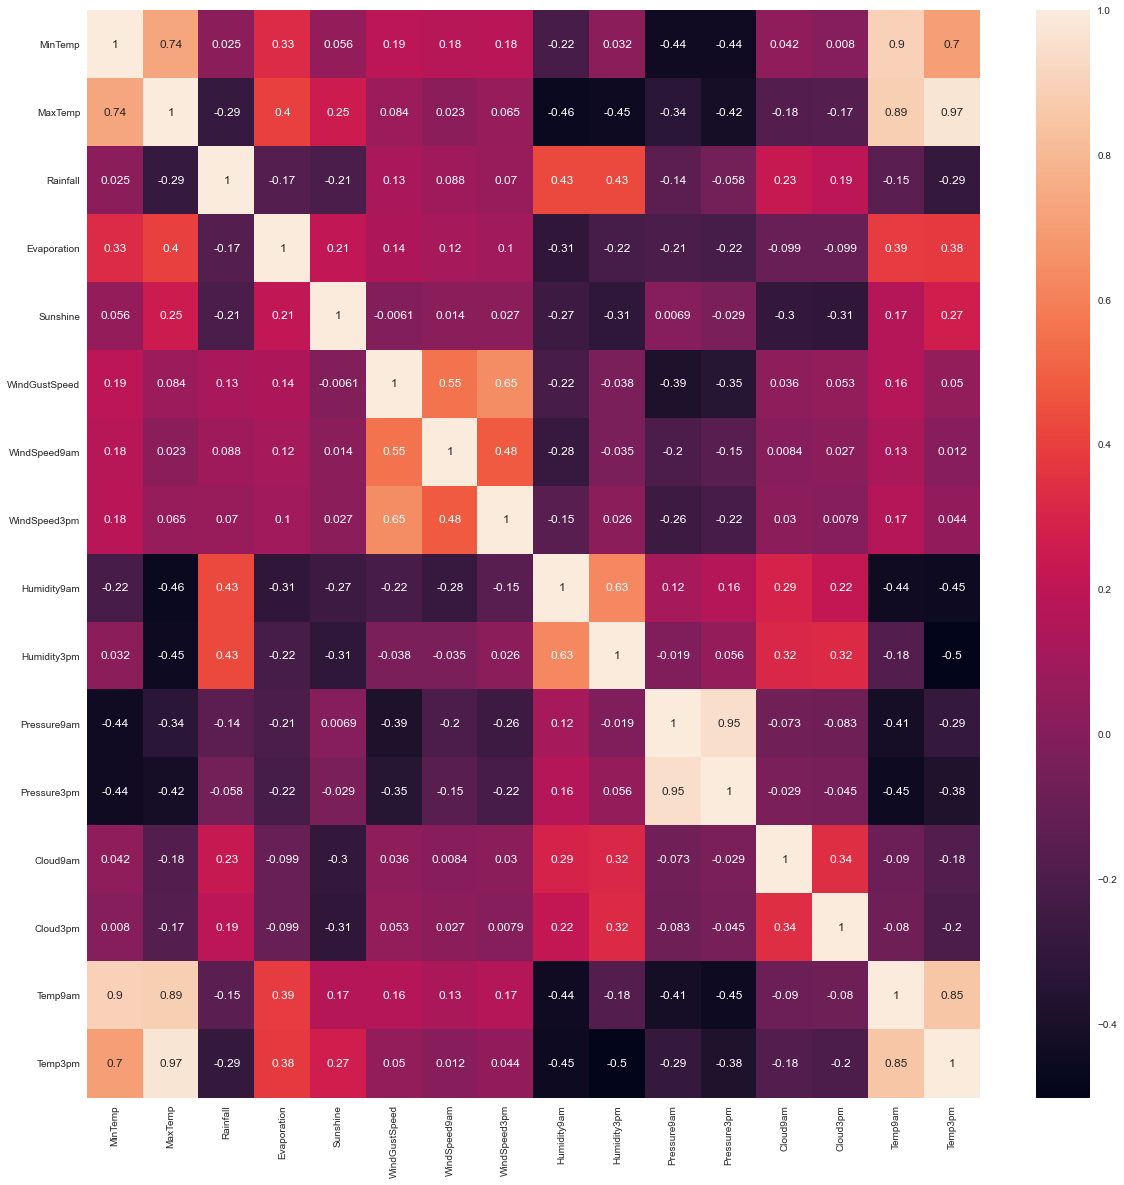

In [ ]:
correlation = df.corr(method = "spearman")

plt.figure(figsize = (20, 20))

heatmap = sns.heatmap(correlation, annot = True)

### Analysis for Continuous varibale

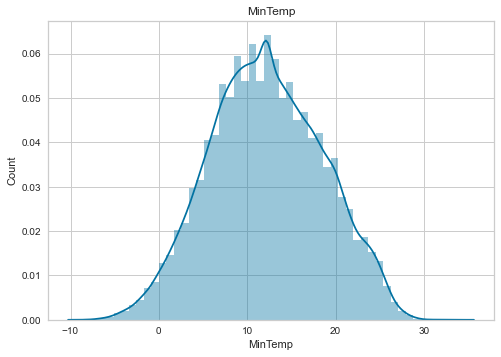

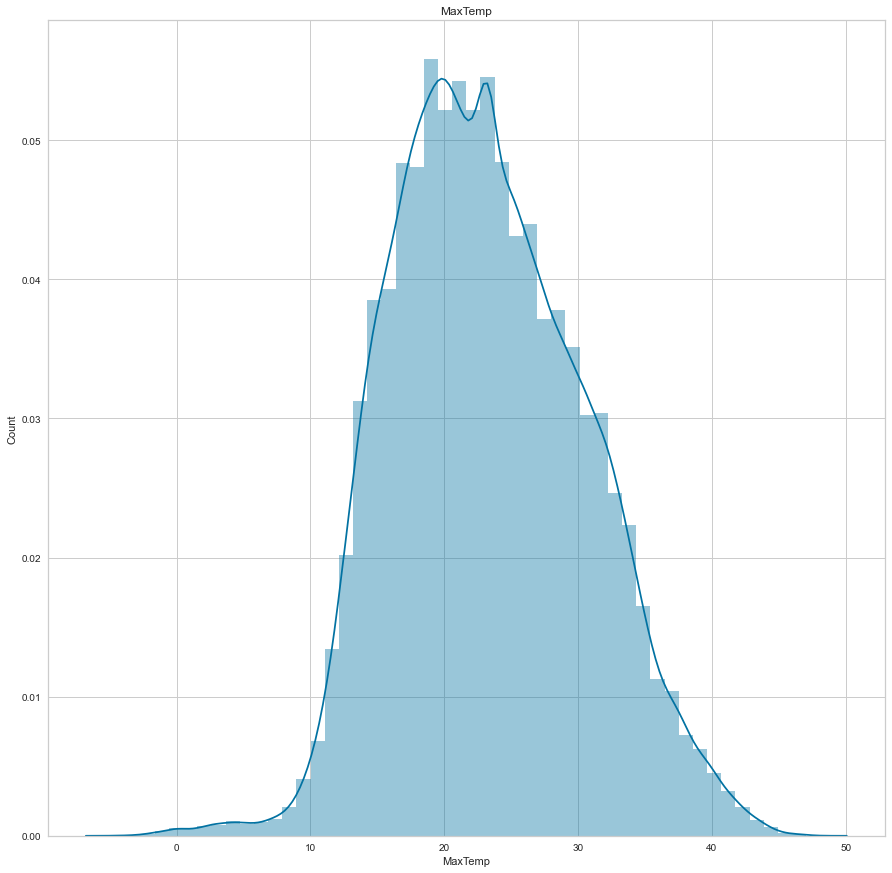

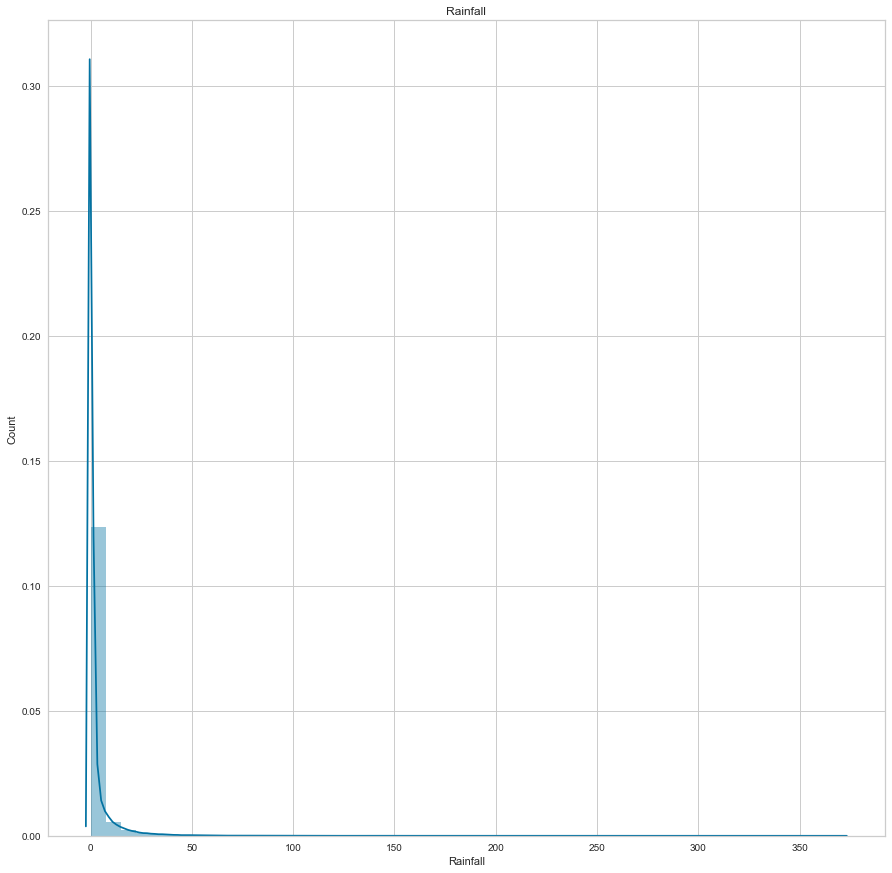

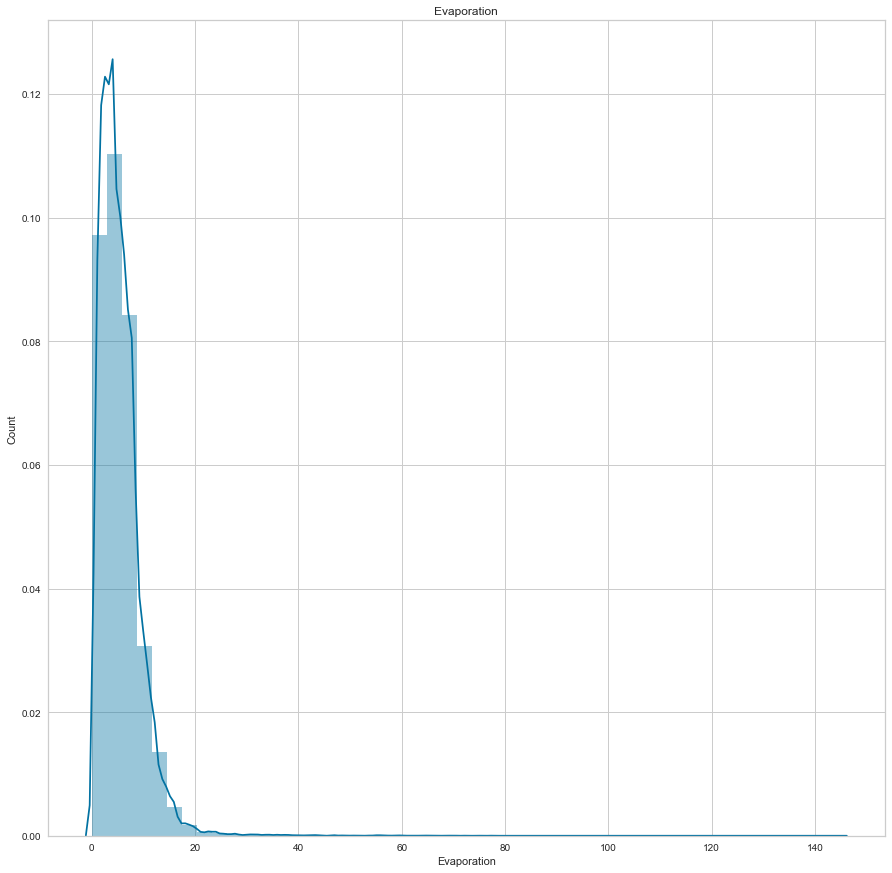

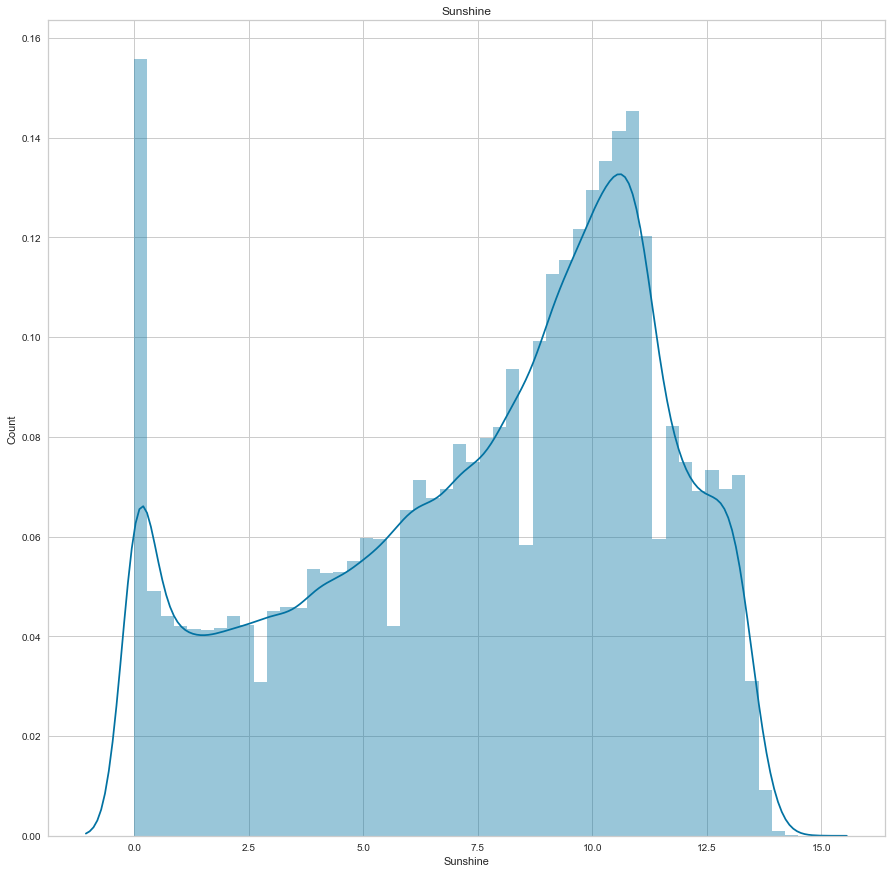

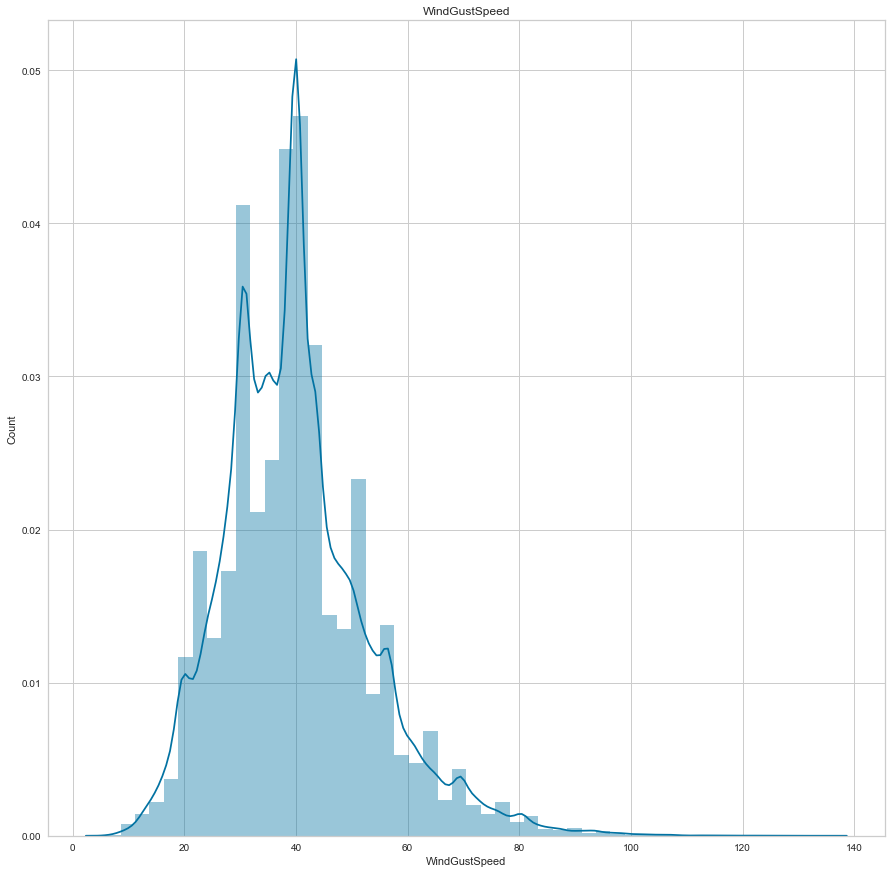

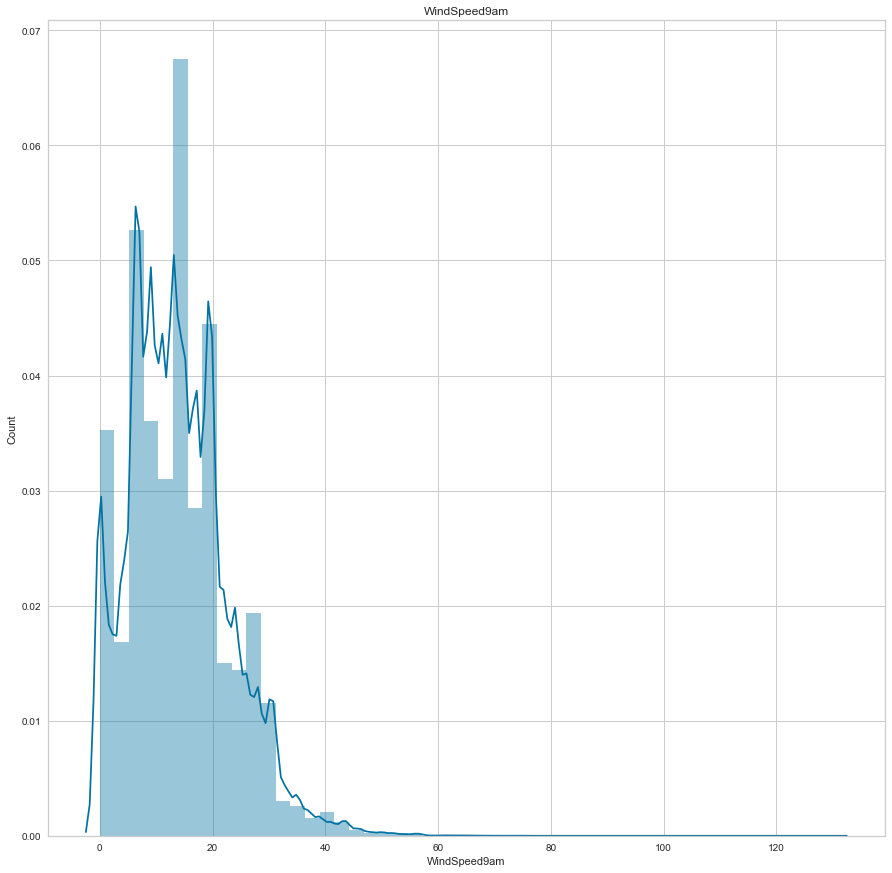

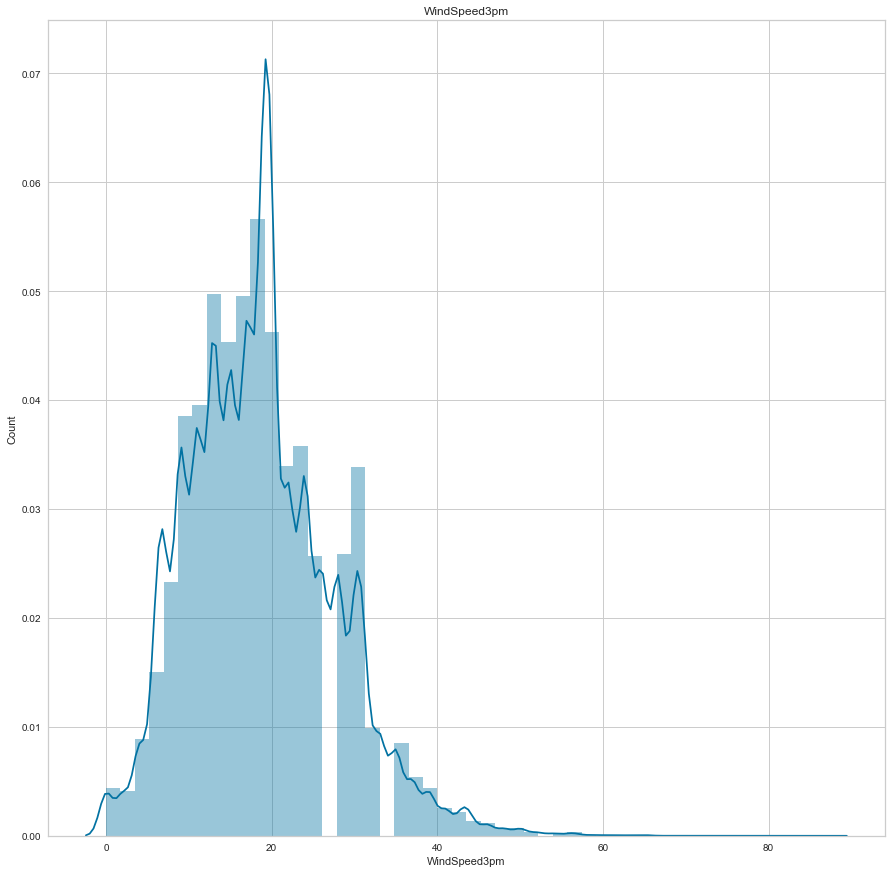

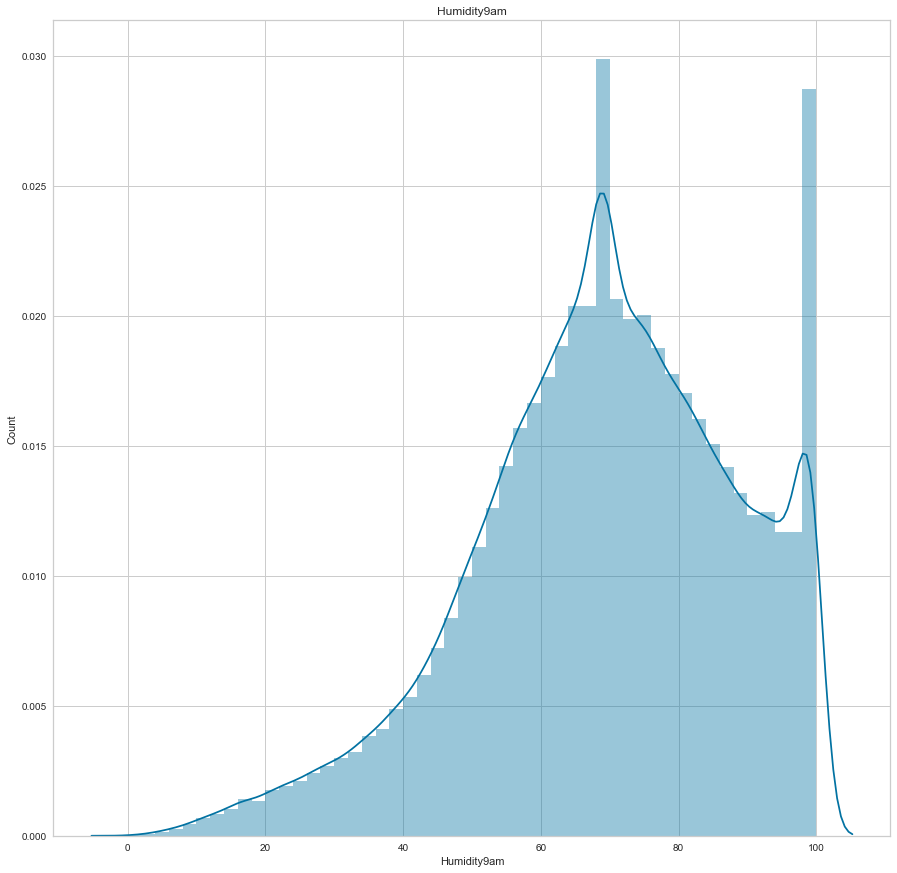

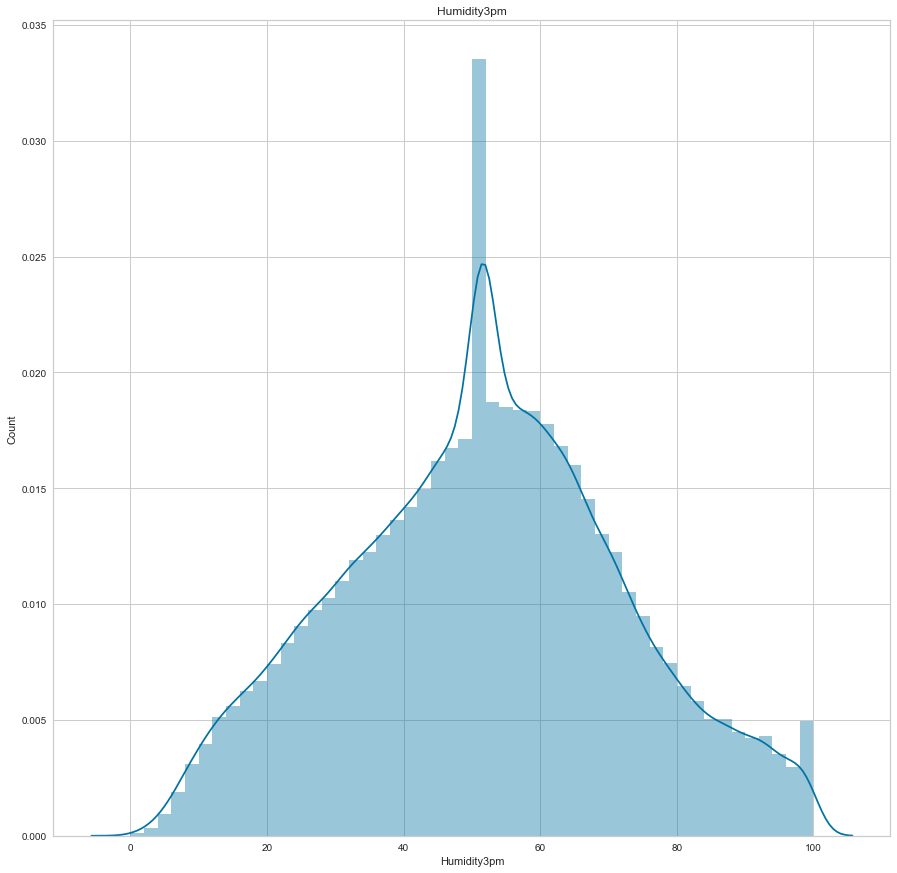

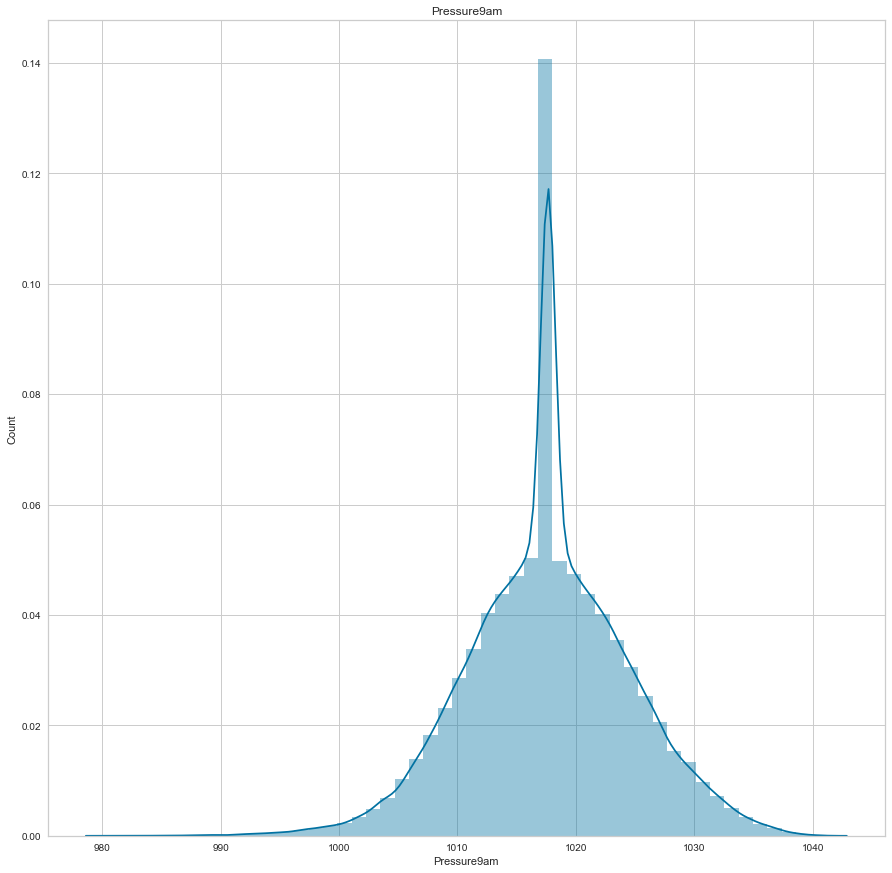

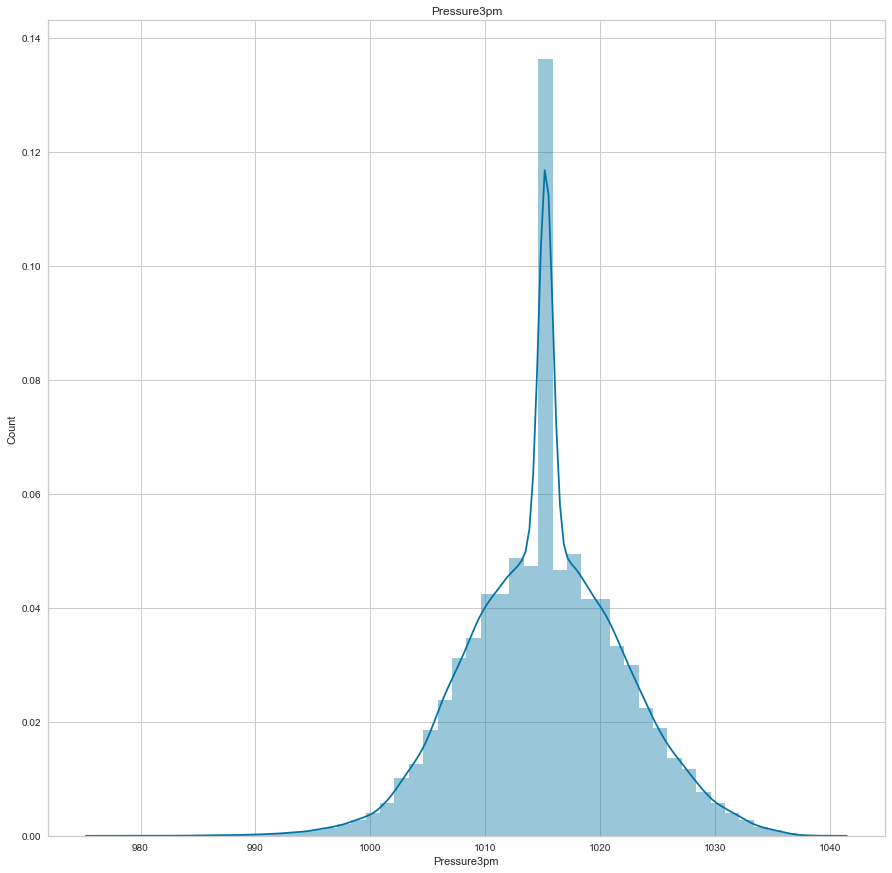

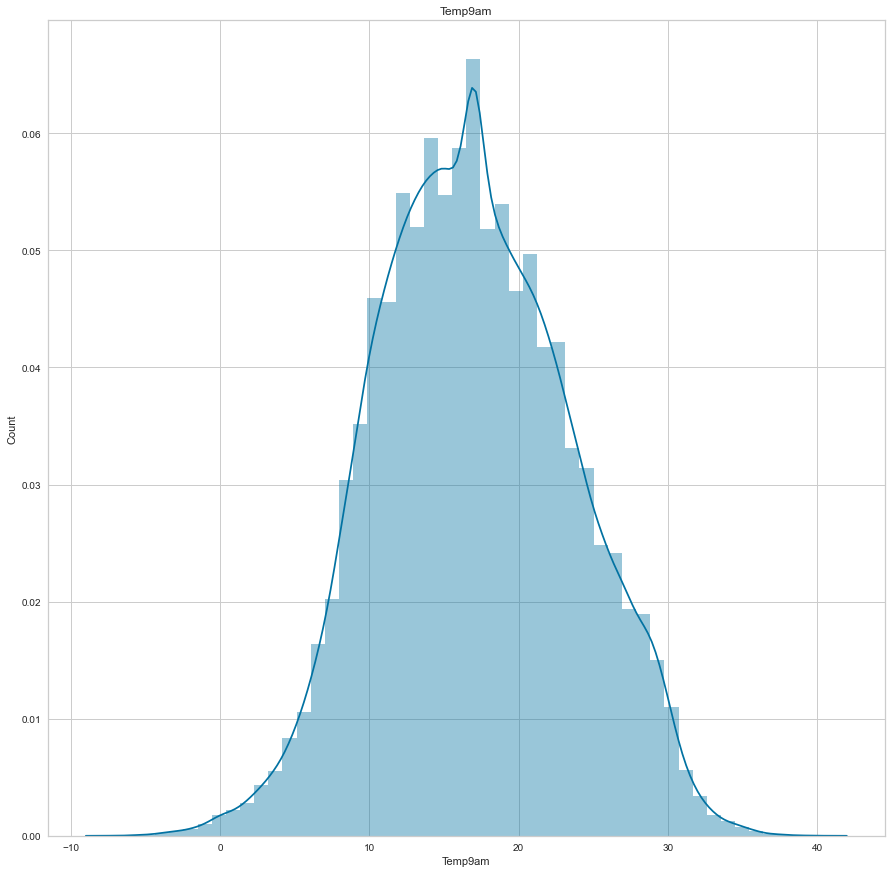

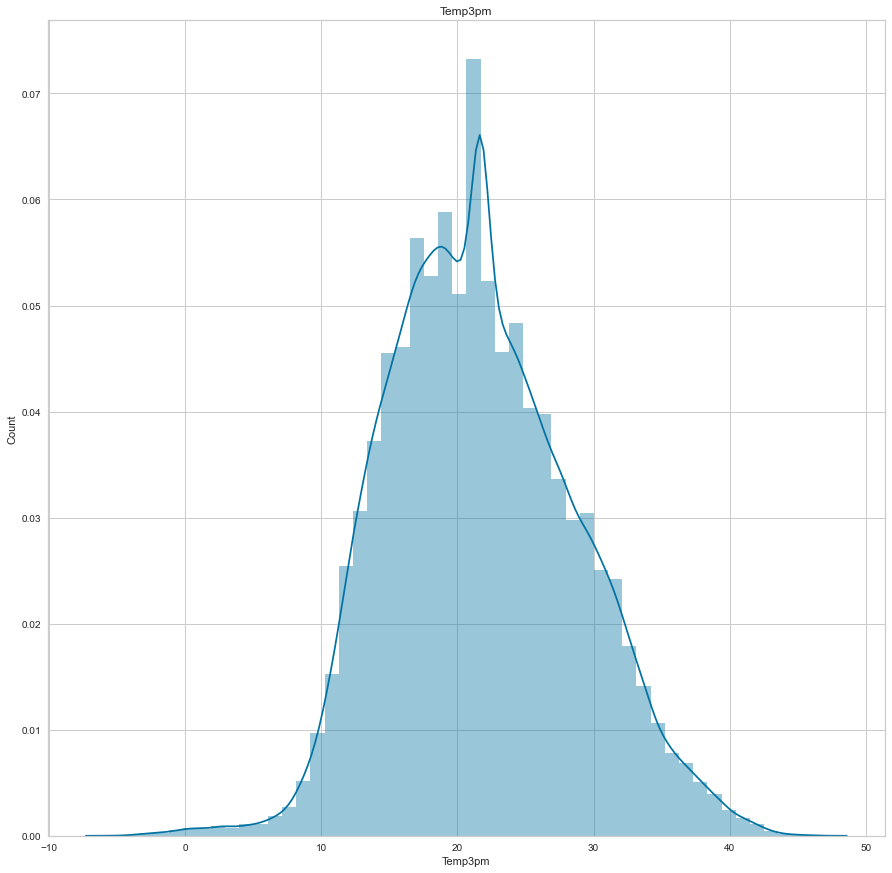

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in cont_var:
    data = df.copy()
    sns.distplot(df[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.figure(figsize = (15, 15));

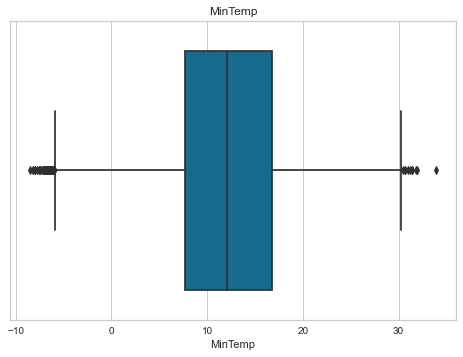

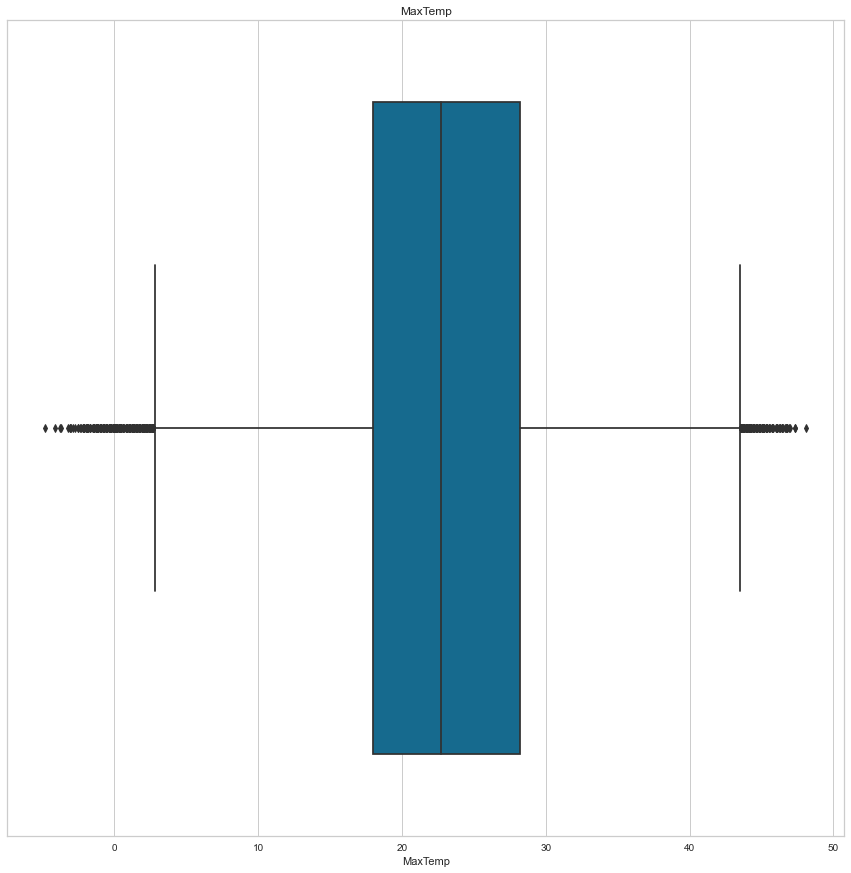

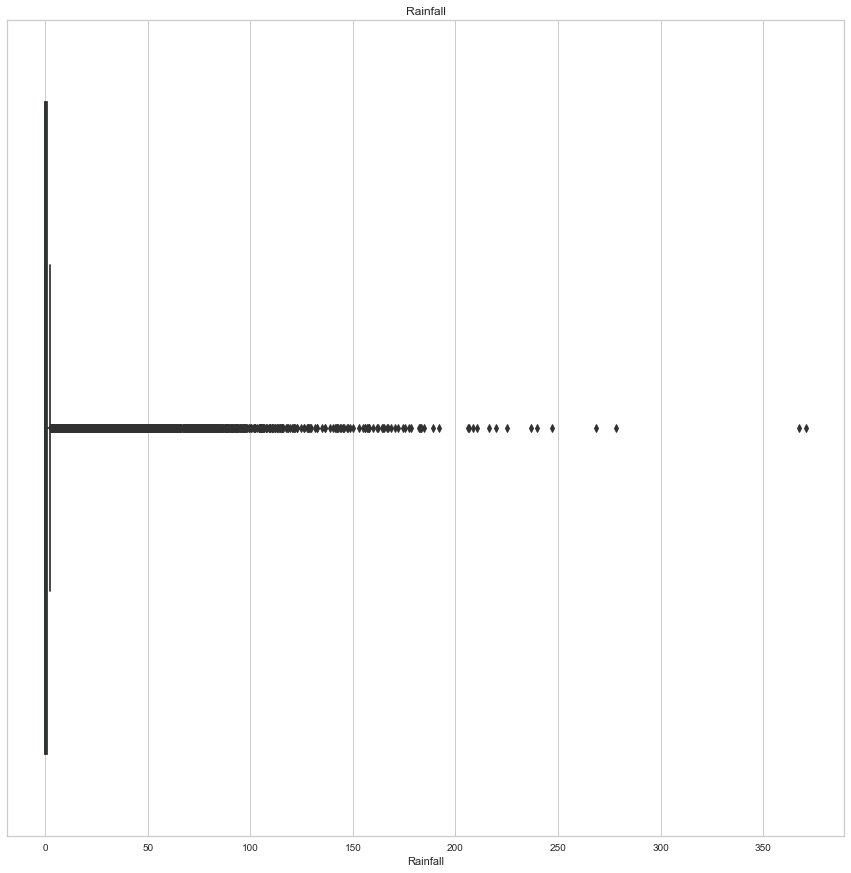

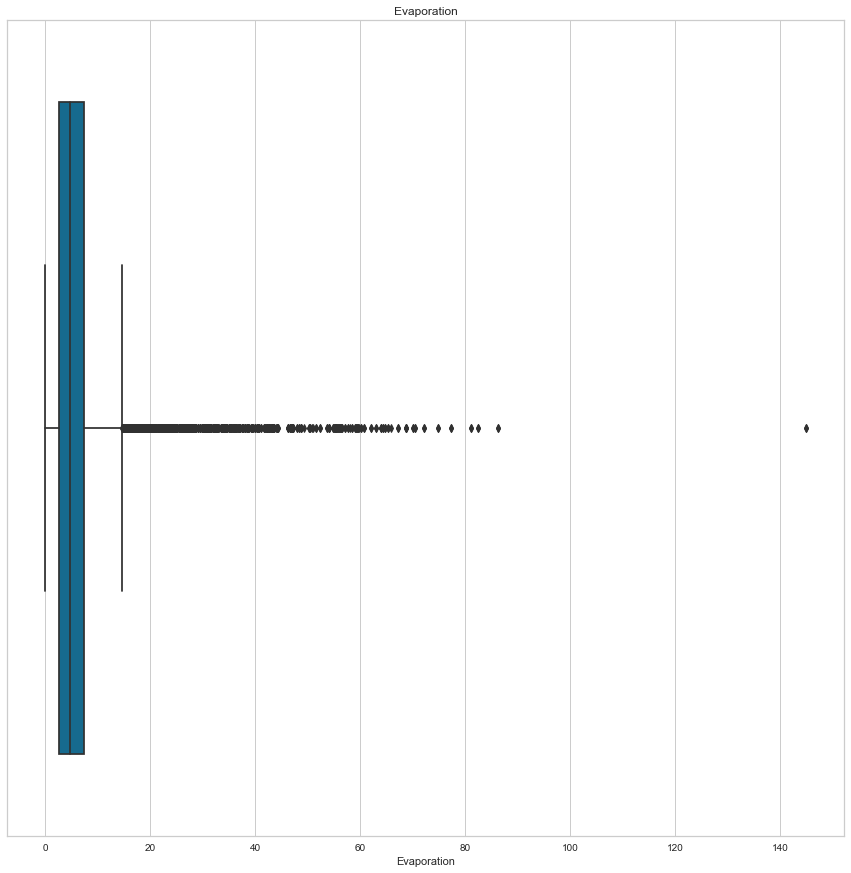

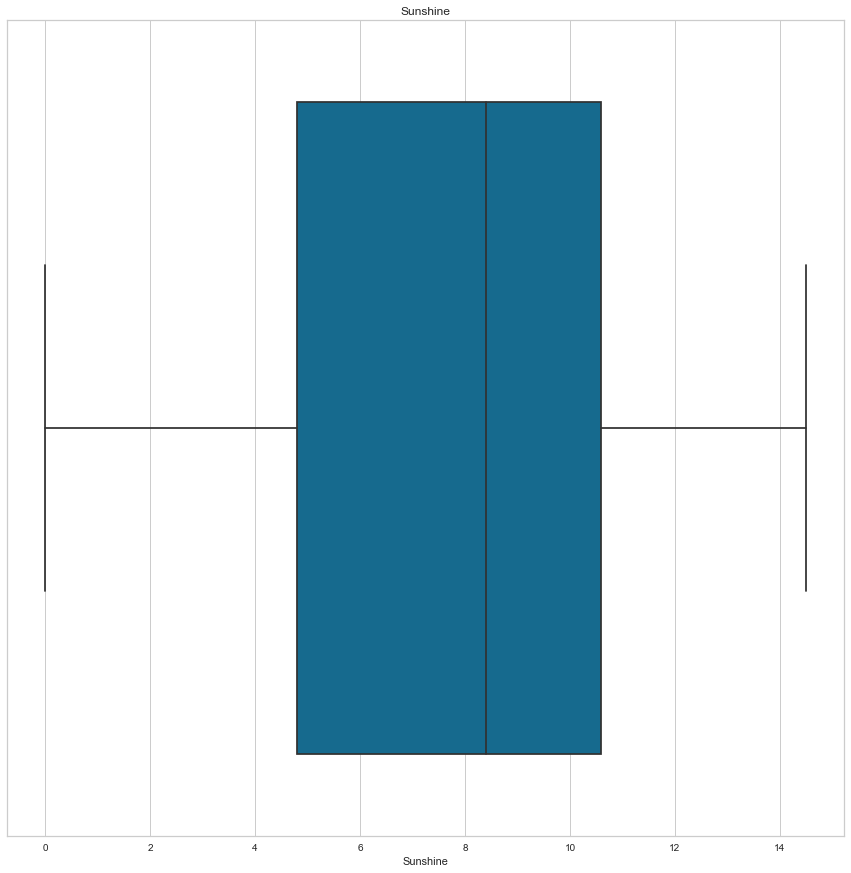

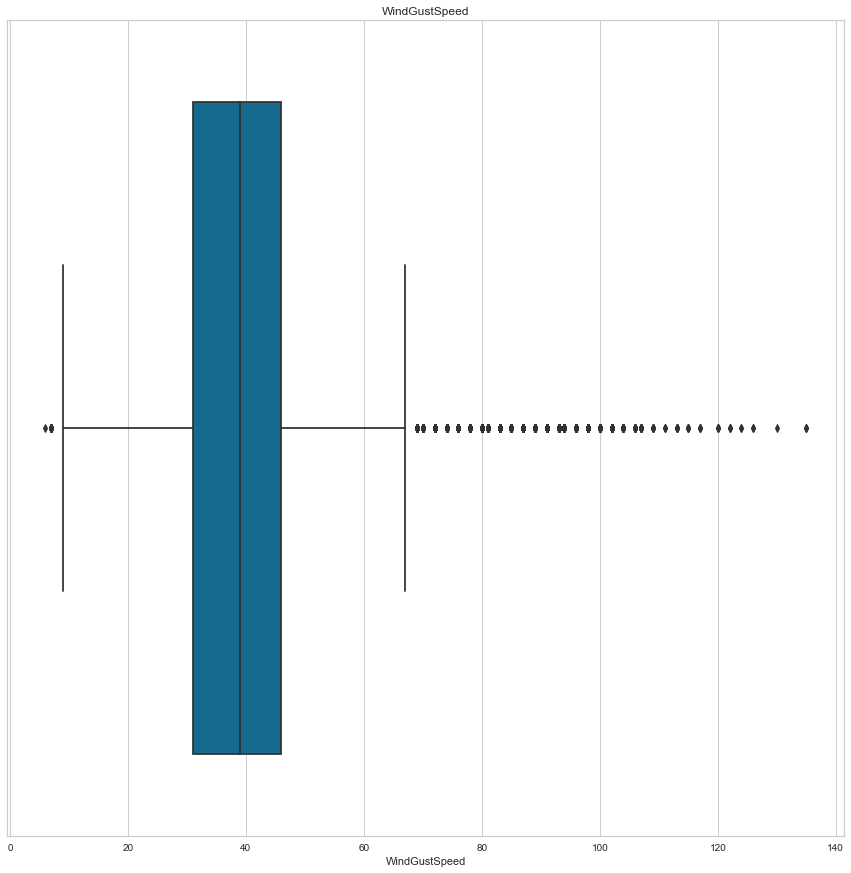

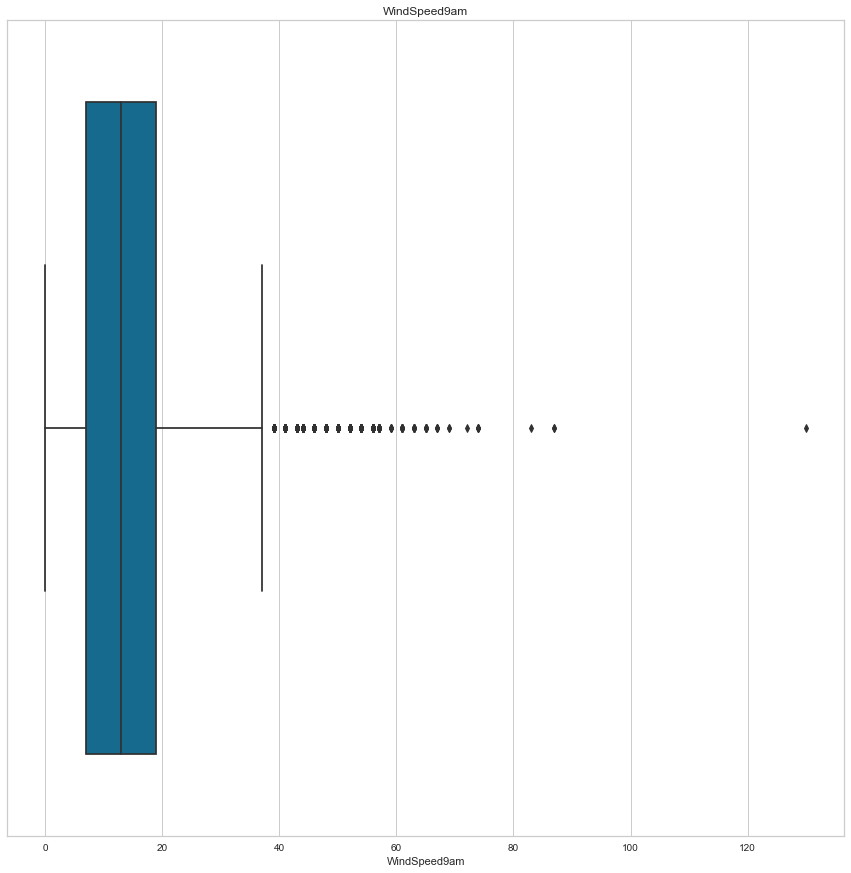

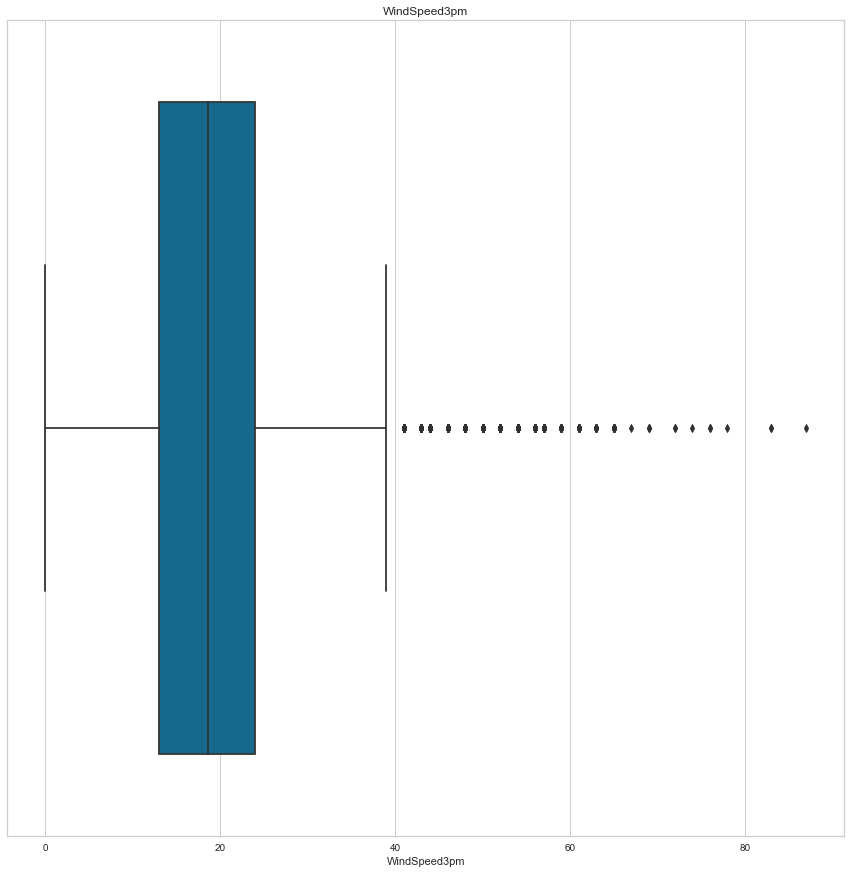

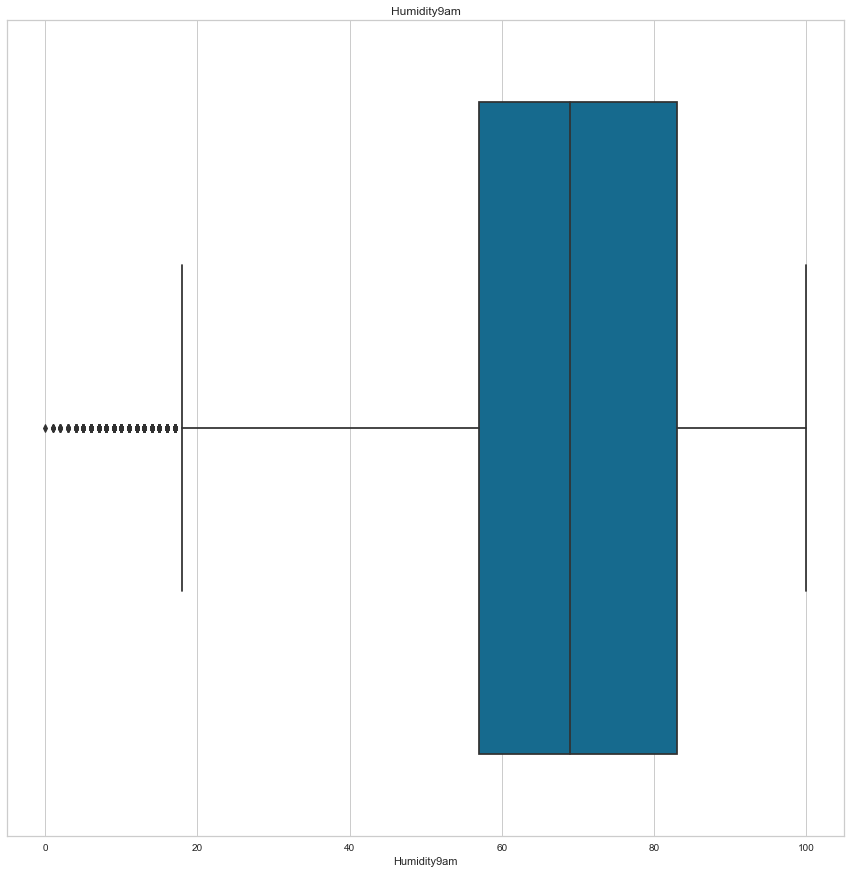

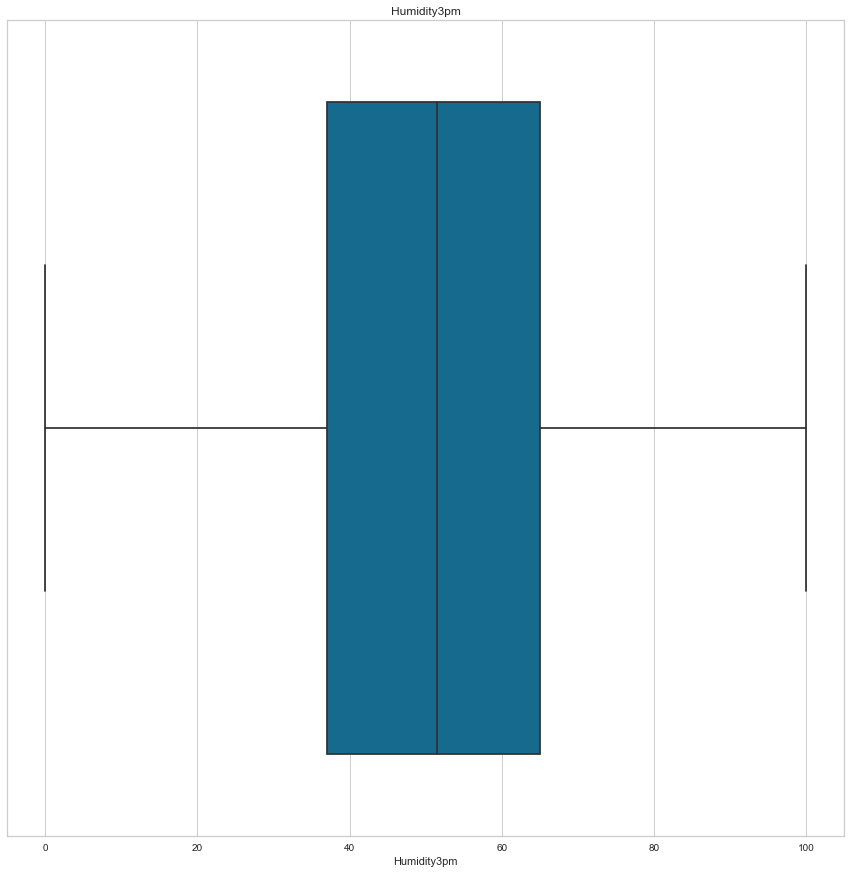

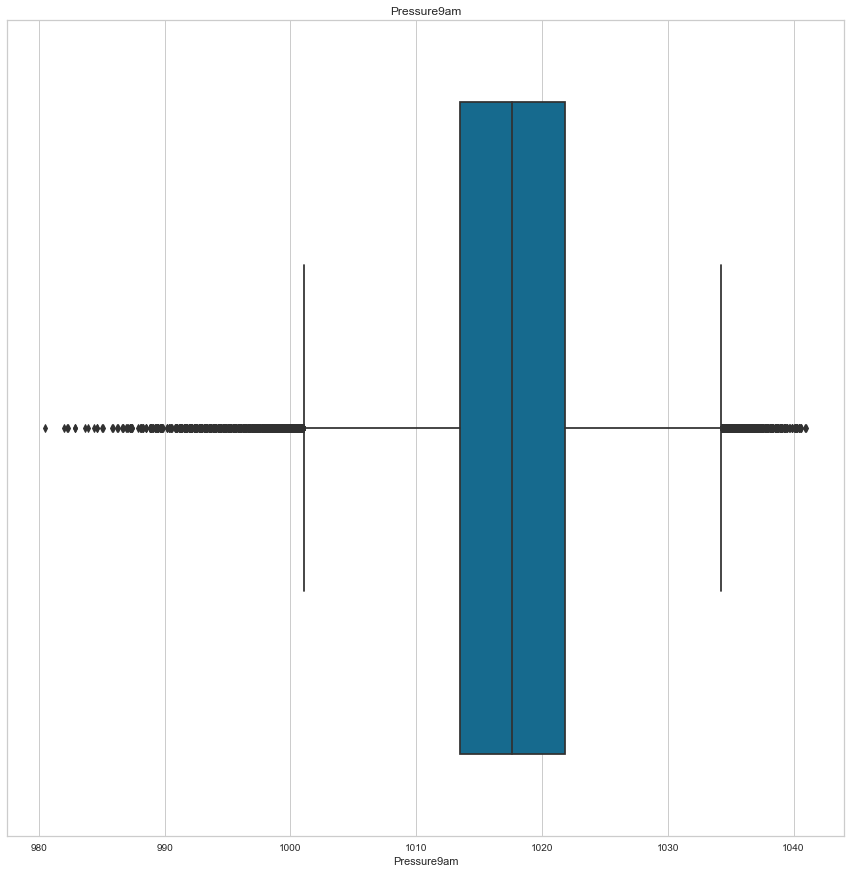

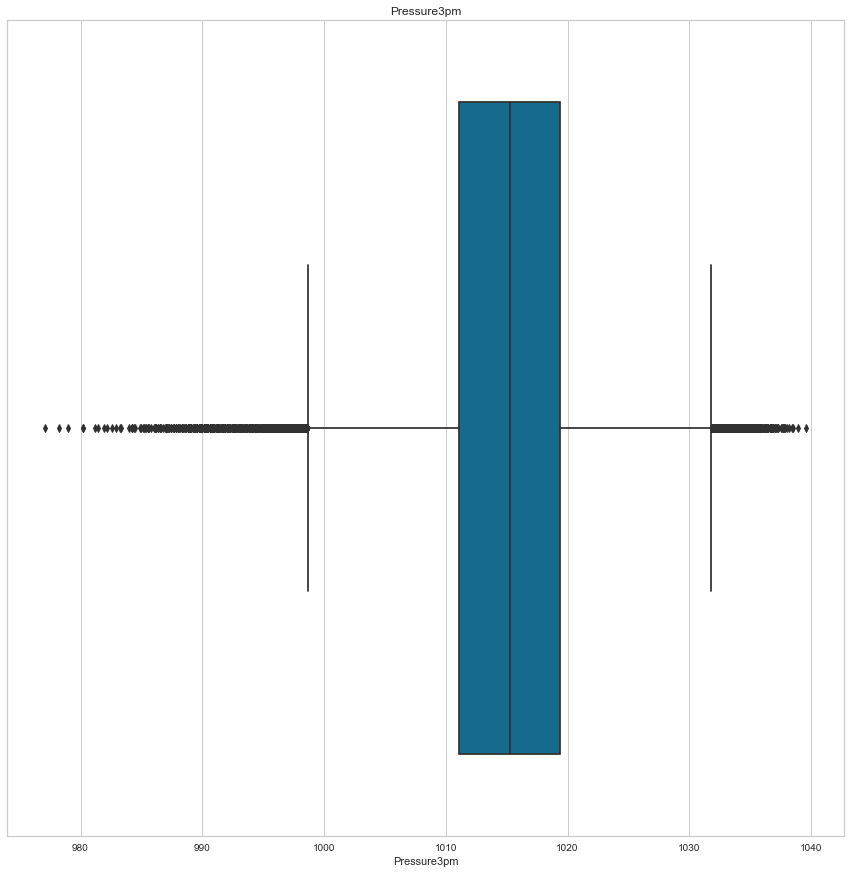

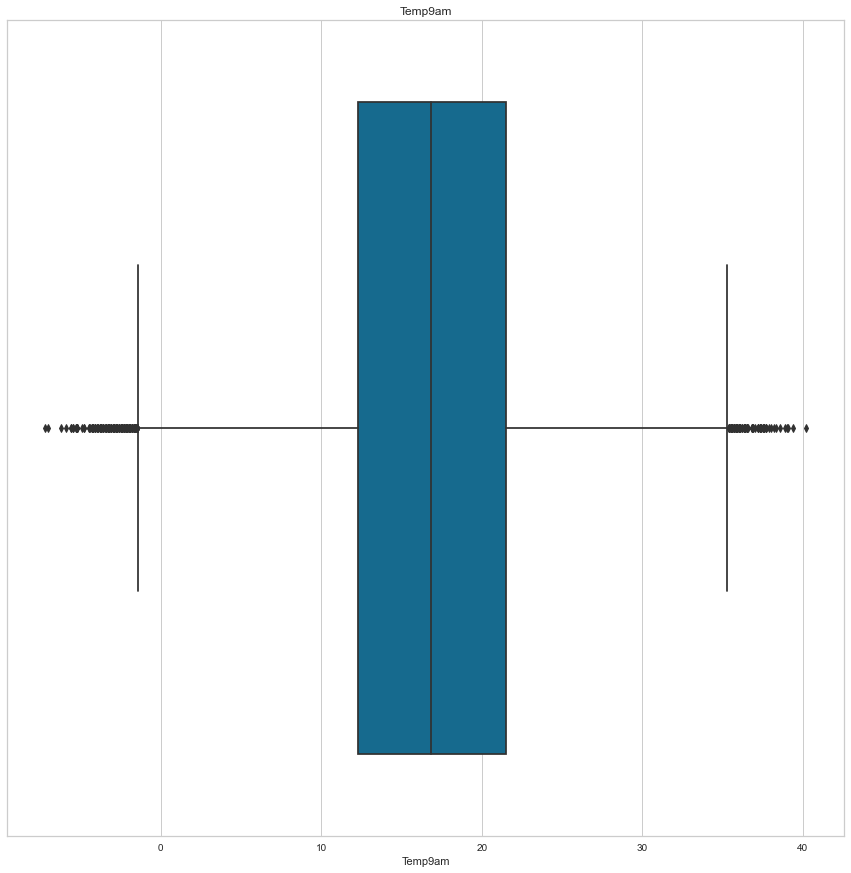

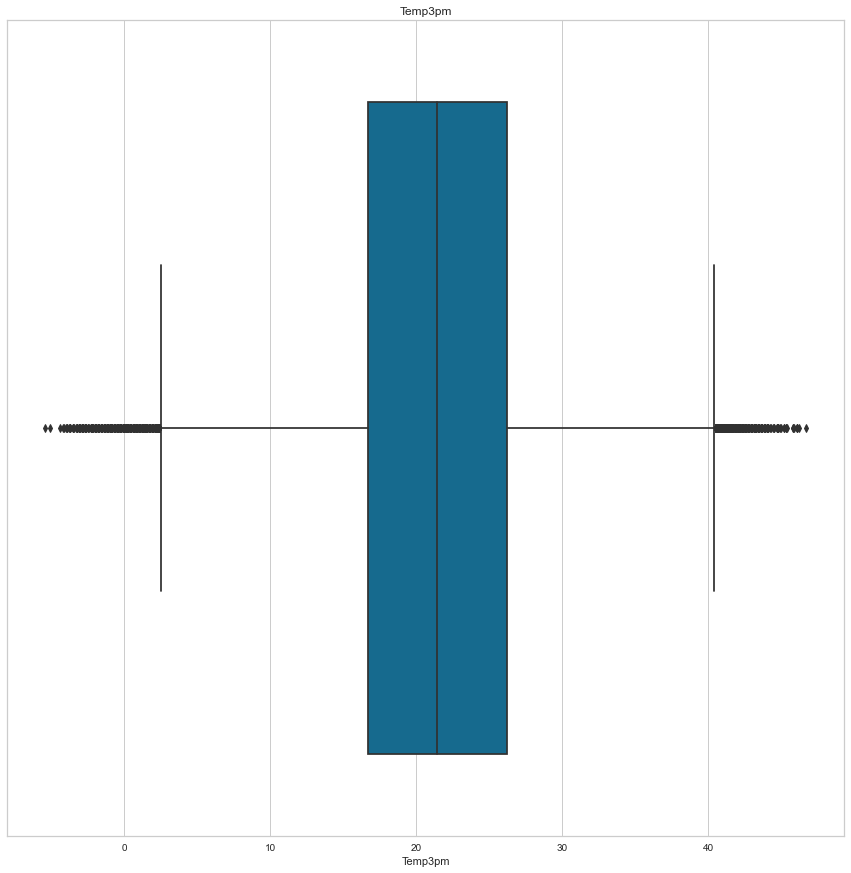

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in cont_var:
    data = df.copy()
    box_plt = sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize = (15, 15));

## Feature Engineering

### One Hot Encoding

In [ ]:
df[["RainToday", "RainTomorrow"]].head(10)

NameError: ignored

In [ ]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)

df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

df[["RainToday", "RainTomorrow"]].head(10)

## Label Encoding 

In [ ]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False).index))

Date Index(['2007-11-01', '2008-01-19', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-05-02', '2008-05-01', '2008-04-30', '2008-04-29', '2008-04-28',
       '2008-04-26', '2008-04-25', '2016-11-26', '2012-04-07', '2008-08-17'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [ ]:
windgustdir = {'NNW' : 0, 'NW' : 1, 'WNW' : 2, 'N' : 3, 'W': 4, 'WSW' : 5, 'NNE' : 6, 'S' : 7, 'SSW' : 8, 'SW' : 9, 'SSE' : 10,
       'NE' : 11, 'SE' : 12, 'ESE' : 13, 'ENE' : 14, 'E' : 15}

winddir9am = {'NNW' : 0, 'N' : 1, 'NW' : 2, 'NNE' : 3, 'WNW' : 4, 'W' : 5
              , 'WSW' : 6, 'SW' : 7, 'SSW' : 8, 'NE' : 9, 'S' : 10,
       'SSE' : 11, 'ENE' : 12, 'SE' : 13, 'ESE' : 14, 'E' : 15}

winddir3pm = {'NW' : 0, 'NNW' : 1, 'N' : 2, 'WNW' : 3, 'W' : 4, 'NNE' : 5, 'WSW' : 6, 'SSW' : 7, 'S' : 8, 'SW' : 9, 'SE' : 10,
       'NE' : 11, 'SSE' : 12, 'ENE' : 13, 'E' : 14, 'ESE' : 15}

# Mapping

df["WindGustDir"] = df["WindGustDir"].map(windgustdir)

df["WindDir9am"] = df["WindDir9am"].map(winddir9am)

df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [ ]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])

df["WindDir9am"] = df["WindDir9am"].fillna(df["WindGustDir"].value_counts().index[0])

df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindGustDir"].value_counts().index[0])

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [ ]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [ ]:
df_loc.head()

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [ ]:
df_loc[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [ ]:
df_loc[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [ ]:
len(df_loc[1].sort_values(ascending = False).index)

49

In [ ]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}

df["Location"] = df["Location"].map(mapped_location)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

df["Date_Month"] = df["Date"].dt.month

df["Date_Day"] = df["Date"].dt.day

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


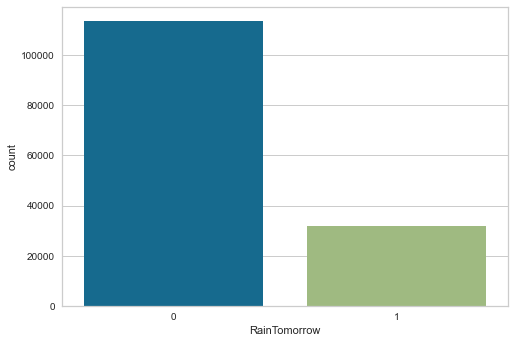

In [ ]:
sns.countplot(df["RainTomorrow"]);

In [ ]:
df = df.drop(columns = "Date")

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [ ]:
def plot_curve(df, feature):
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist = "norm", plot = pylab)
    plt.title(feature)
    plt.show()

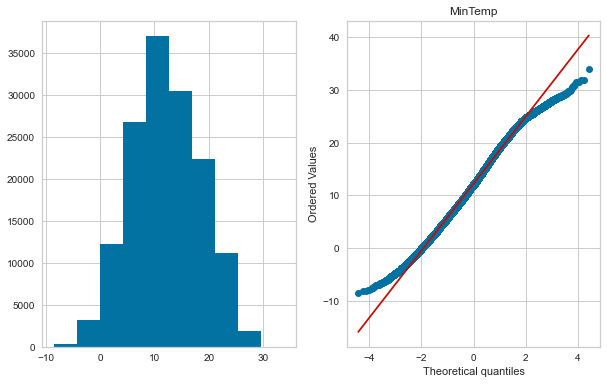

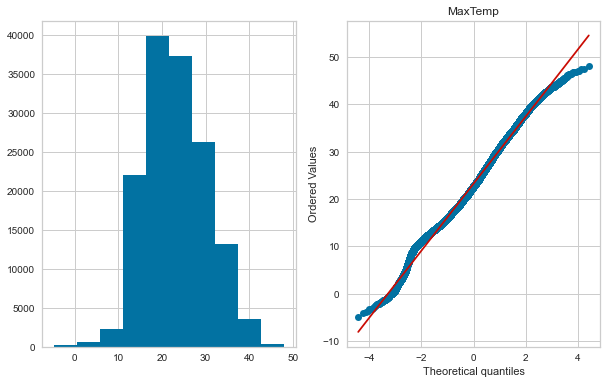

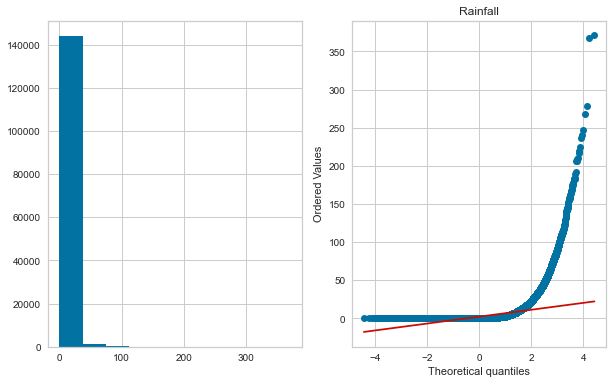

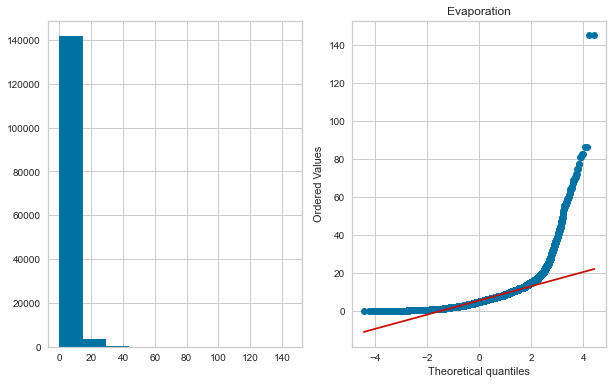

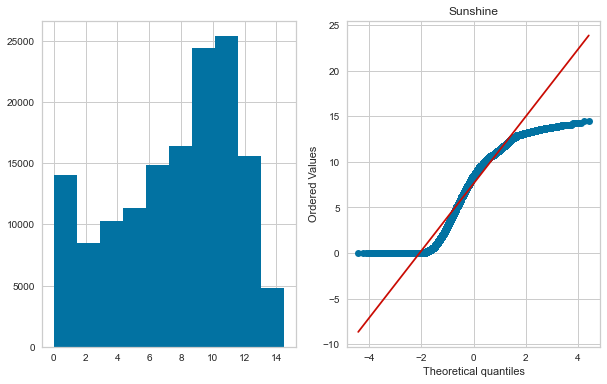

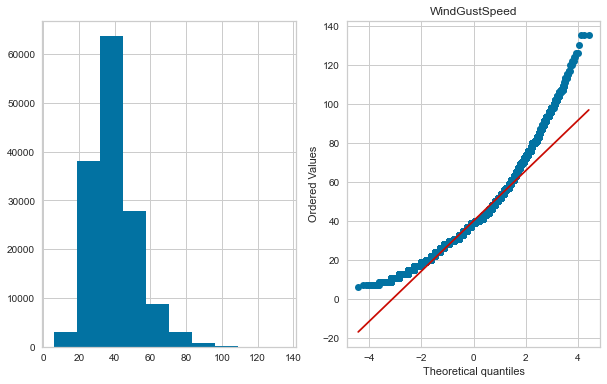

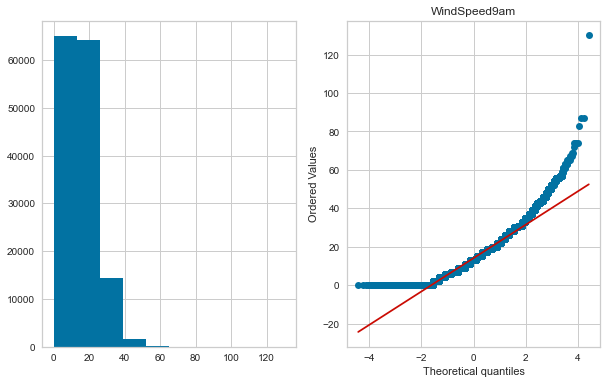

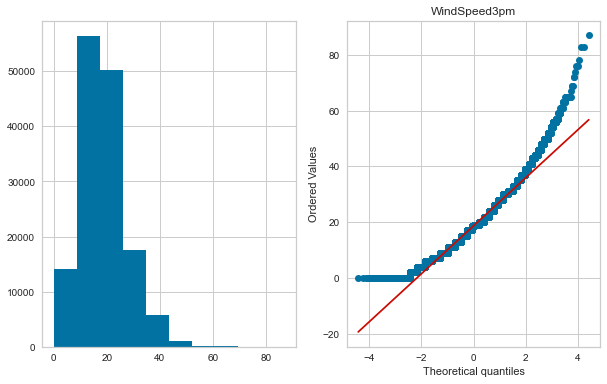

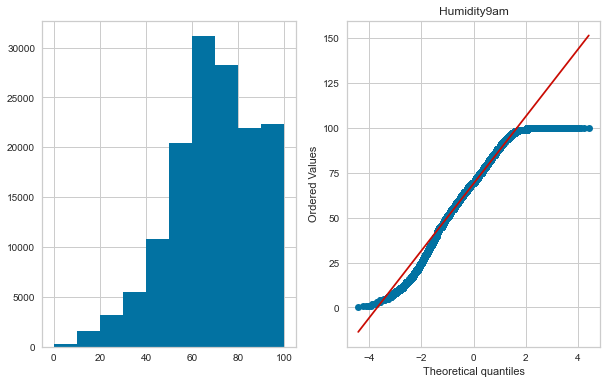

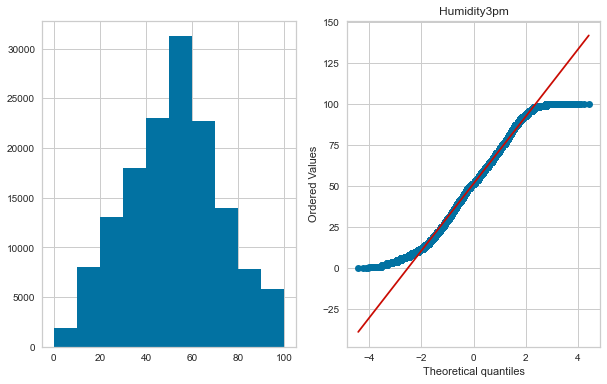

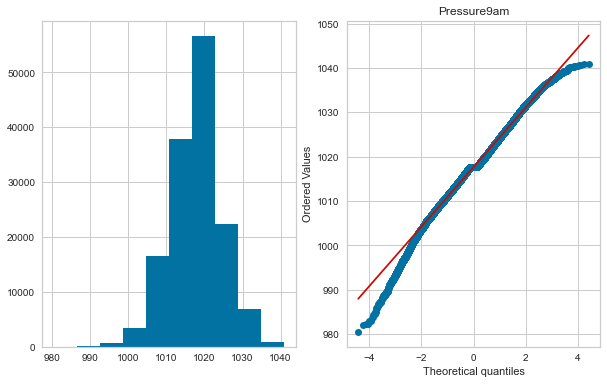

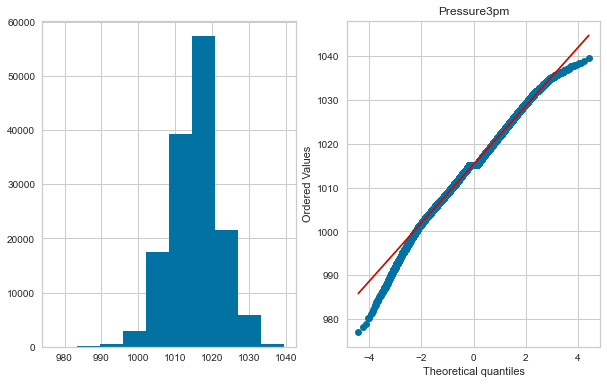

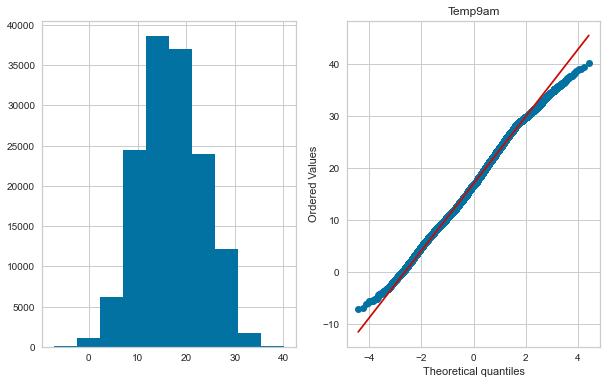

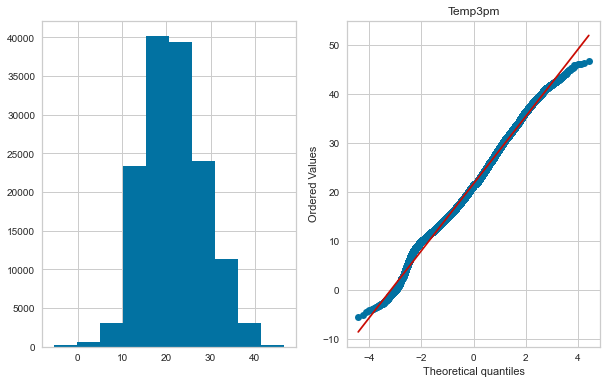

In [ ]:
for i in cont_var:
    plot_curve(df, i)

## Splitting the data

In [ ]:
x = df.drop(columns = "RainTomorrow")

y = df["RainTomorrow"]

In [ ]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_Month,Date_Day
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,12,5


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: uint8

In [ ]:
scale = StandardScaler()

In [ ]:
scale.fit(x)

StandardScaler()

In [ ]:
X = scale.transform(x)

In [ ]:
X = pd.DataFrame(X, columns = x.columns)

X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_Month,Date_Day
0,0.415017,0.189447,-0.045336,-0.210072,-0.727927,0.182347,-0.740424,0.302234,-0.471643,-0.981712,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.230562,-1.657694,-0.014053,0.017023,-0.529795,1.634076,-1.672844
1,0.415017,-0.753101,0.265043,-0.281650,-0.442930,0.631373,-1.187566,0.302234,-1.552235,-0.316881,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.884261,-1.289981,0.032464,0.381985,-0.529795,1.634076,-1.559140
2,0.415017,0.110901,0.349692,-0.281650,-0.680427,-0.847773,-0.516853,0.454694,-0.471643,-0.316881,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,1.230562,-0.922267,0.621685,0.221402,-0.529795,1.634076,-1.445436
3,0.415017,-0.470337,0.674180,-0.281650,3.072032,0.340827,0.824574,-1.222364,1.257303,1.456004,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-1.539848,0.180874,0.172017,0.703151,-0.529795,1.634076,-1.331732
4,0.415017,0.833521,1.280830,-0.162353,-0.015435,-1.217559,-0.740424,0.073544,1.041185,-1.646544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.884261,1.284015,0.125499,1.170302,-0.529795,1.634076,-1.218028


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

## Model Building using ML Models

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
ypred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, ypred))

print("\nAccuracy :",np.round(accuracy_score(y_test, ypred)*100, 2))

print("\n",classification_report(y_test, ypred))

[[21770   956]
 [ 3345  3021]]

Accuracy : 85.22

               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.47      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



0.7162429767131991

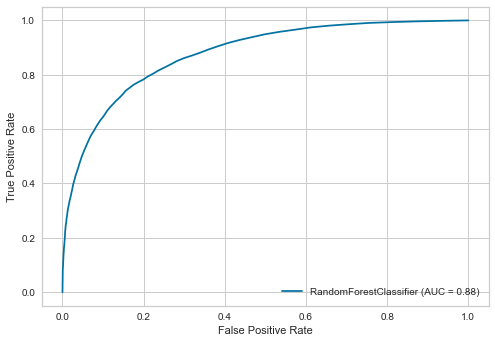

In [ ]:
# roc curve

metrics.plot_roc_curve(rfc, X_test, y_test)

metrics.roc_auc_score(y_test, ypred, average = None)

### Gaussian NB

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
ypred2 = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, ypred2))

print("\nAccuracy :",np.round(accuracy_score(y_test, ypred2)*100, 2))

print("\n",classification_report(y_test, ypred2))

[[19831  2895]
 [ 2716  3650]]

Accuracy : 80.71

               precision    recall  f1-score   support

           0       0.88      0.87      0.88     22726
           1       0.56      0.57      0.57      6366

    accuracy                           0.81     29092
   macro avg       0.72      0.72      0.72     29092
weighted avg       0.81      0.81      0.81     29092



0.722985666587841

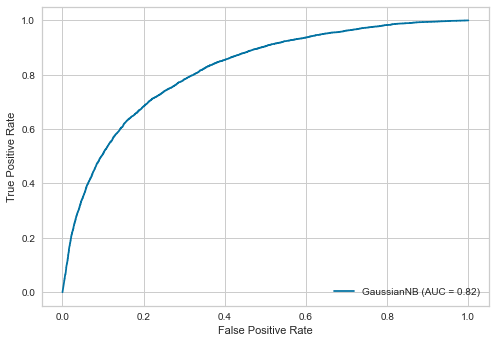

In [ ]:
# roc curve

metrics.plot_roc_curve(gnb, X_test, y_test)

metrics.roc_auc_score(y_test, ypred2, average = None)

### K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
ypred3 = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, ypred3))

print("\nAccuracy : ",np.round(accuracy_score(y_test, ypred3)*100, 2))

print("\n",classification_report(y_test, ypred3))

[[20938  1788]
 [ 3220  3146]]

Accuracy :  82.79

               precision    recall  f1-score   support

           0       0.87      0.92      0.89     22726
           1       0.64      0.49      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.72     29092
weighted avg       0.82      0.83      0.82     29092



0.7077557335984928

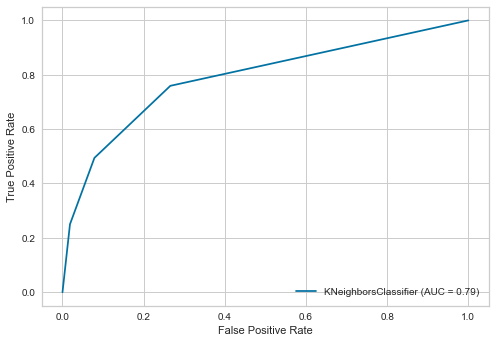

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)

metrics.roc_auc_score(y_test, ypred3, average = None)

### XGB Classifier

In [ ]:
xgb = XGBClassifier(eval_metric='mlogloss')

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
ypred4 = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, ypred4))

print("\nAccuracy Score :", np.round(accuracy_score(y_test, ypred4)*100, 2))

print("\n", classification_report(y_test, ypred4))

[[21557  1169]
 [ 2957  3409]]

Accuracy Score : 85.82

               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.74      0.54      0.62      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



0.742031109507134

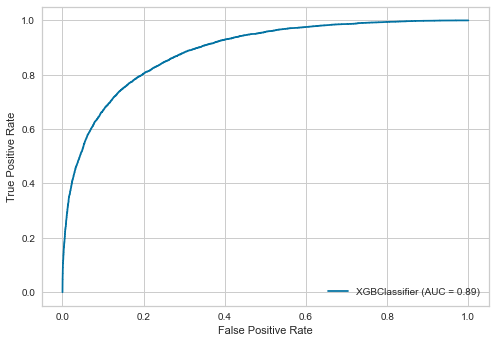

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)

metrics.roc_auc_score(y_test, ypred4, average = None)

The best performing model is <b>XGB Classifier model</b>

In [ ]:
#file = open("XGB model.pkl", "wb")

#pickle.dump(xgb, file)

#model = pickle.load(open("XGB model.pkl", "rb"))

In [ ]:
file = open('rain_XGBnew_model.pkl', 'wb')

In [ ]:
pickle.dump(xgb, file)

In [ ]:
#model = pickle.load(open("", "rb"))

In [ ]:
with open("rain_XGBnew_model.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
# file = open('rain_XGBnew_model.pkl', 'wb')
# pickle.dump(xgb, file)
# model = pickle.load(open("rain_XGBnew_model.pkl", "rb"))

In [ ]:
# !pip install pycaret

In [ ]:
model = setup(data= df, target= 'RainTomorrow')

,Description,Value
0,session_id,7497
1,Target,RainTomorrow
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(145460, 24)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare_models()

<b>Lightgbm</b> model was the best model.

In [ ]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8599,0.8786,0.5328,0.7540,0.6244,0.5413,0.5537
1,0.8543,0.8789,0.5137,0.7398,0.6064,0.5205,0.5335
2,0.8601,0.8813,0.5276,0.7589,0.6225,0.5400,0.5535
3,0.8547,0.8836,0.5007,0.7517,0.6010,0.5166,0.5325
4,0.8551,0.8804,0.5263,0.7356,0.6136,0.5274,0.5386
5,0.8517,0.8737,0.5151,0.7267,0.6028,0.5149,0.5264
6,0.8558,0.8825,0.5137,0.7475,0.6090,0.5243,0.5381
7,0.8548,0.8802,0.5110,0.7446,0.6061,0.5209,0.5347
8,0.8550,0.8814,0.5227,0.7375,0.6118,0.5258,0.5376


In [ ]:
prediction = predict_model(lightgbm, data = X_test)

prediction

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_Month,Date_Day,Label,Score
138175,46,21.9,39.4,1.6,11.2,11.5,0.0,57.00000,9.0,2.0,...,1004.100000,2.0,6.0,29.8,35.4,1,12,3,0,0.6455
38638,38,20.5,37.5,0.0,9.2,8.4,2.0,59.00000,12.0,2.0,...,1006.500000,4.0,7.0,27.3,35.7,0,1,8,0,0.5611
124058,41,5.1,17.2,0.2,4.1,7.3,4.0,50.00000,4.0,4.0,...,1015.255889,3.0,3.0,10.1,16.1,0,8,16,0,0.8491
99214,24,11.9,16.8,1.0,1.8,10.8,9.0,28.00000,4.0,9.0,...,1017.700000,3.0,2.0,14.3,15.2,0,8,31,0,0.6080
25097,31,7.5,21.3,0.0,2.2,13.1,11.0,15.00000,7.0,5.0,...,1015.255889,1.0,8.0,13.7,21.1,0,8,28,0,0.9028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133493,23,18.2,24.4,8.0,3.4,10.9,1.0,44.00000,11.0,0.0,...,1003.400000,8.0,7.0,20.1,23.9,1,3,8,1,0.5628
43818,20,9.4,18.0,0.0,1.0,8.5,5.0,48.00000,6.0,6.0,...,1026.300000,1.0,8.0,12.5,17.3,0,6,24,0,0.9740
28118,37,10.6,15.4,6.0,1.6,13.3,12.0,28.00000,8.0,0.0,...,1006.600000,2.0,8.0,10.7,13.9,1,9,9,0,0.5353
120179,35,18.6,26.9,0.0,4.0,7.2,15.0,63.00000,15.0,14.0,...,1020.100000,7.0,6.0,21.3,25.8,0,3,24,0,0.7361
